Predict Customer Churn with Python and Machine Learning

- [Resource](https://thecleverprogrammer.com/2020/05/26/predict-customer-churn-with-python-and-machine-learning/)

Sweetviz is an open source Python library that generates beautiful, high-density visualizations to kickstart EDA (Exploratory Data Analysis) with just two lines of code. Output is a fully self-contained HTML application.

In [1]:
!pip install sweetviz

In [2]:
# Import the libraries

import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [3]:
# Read and look at the data 

df = pd.read_csv("churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Show the number of rows and columns

df.shape

(7043, 21)

In [5]:
# Check columns names

df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [6]:
# Check missing values

df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
# Show statistics

df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Analyzing the dataframe with Sweetviz

In [8]:
import sweetviz as sv

my_report = sv.analyze(df)
my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [9]:
# Count customer count

df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


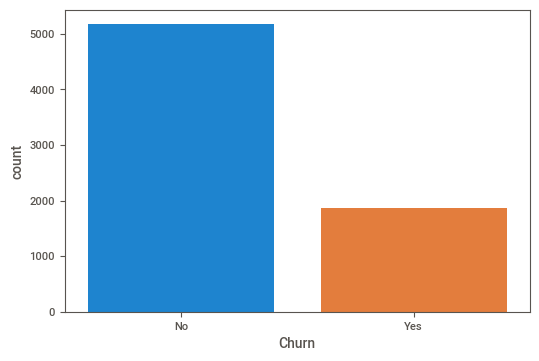

In [10]:
# Visualizing the customer churn count

sns.countplot(df['Churn'])

In [11]:
# Percentage of customers leaving company

numbRetained = df[df.Churn == 'No'].shape[0]
numbChurned = df[df.Churn == 'Yes'].shape[0]

# print the percentage of customers that stayed
print(numbRetained/(numbRetained + numbChurned) * 100,'% of customers stayed in the company')
# peint the percentage of customers that left
print(numbChurned/(numbRetained + numbChurned) * 100, '% of customers left with the company')

73.4630129206304 % of customers stayed in the company
26.536987079369588 % of customers left with the company


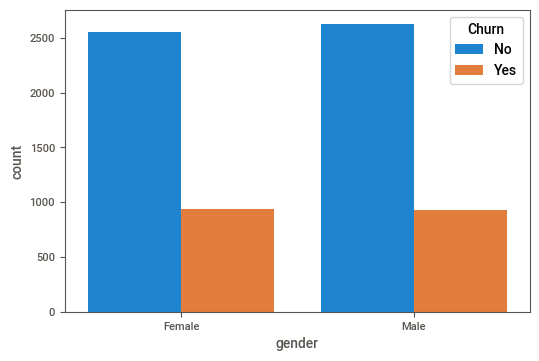

In [12]:
# Visualize the count for both males and females

sns.countplot(x ='gender', hue='Churn', data=df)

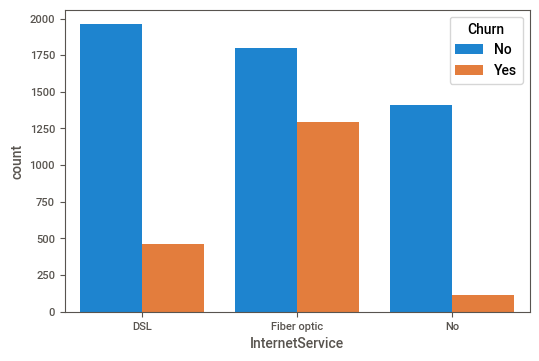

In [13]:
# Visualize the churn count for the internet service

sns.countplot(x='InternetService', hue='Churn', data=df)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff33db42470>,
      dtype=object)

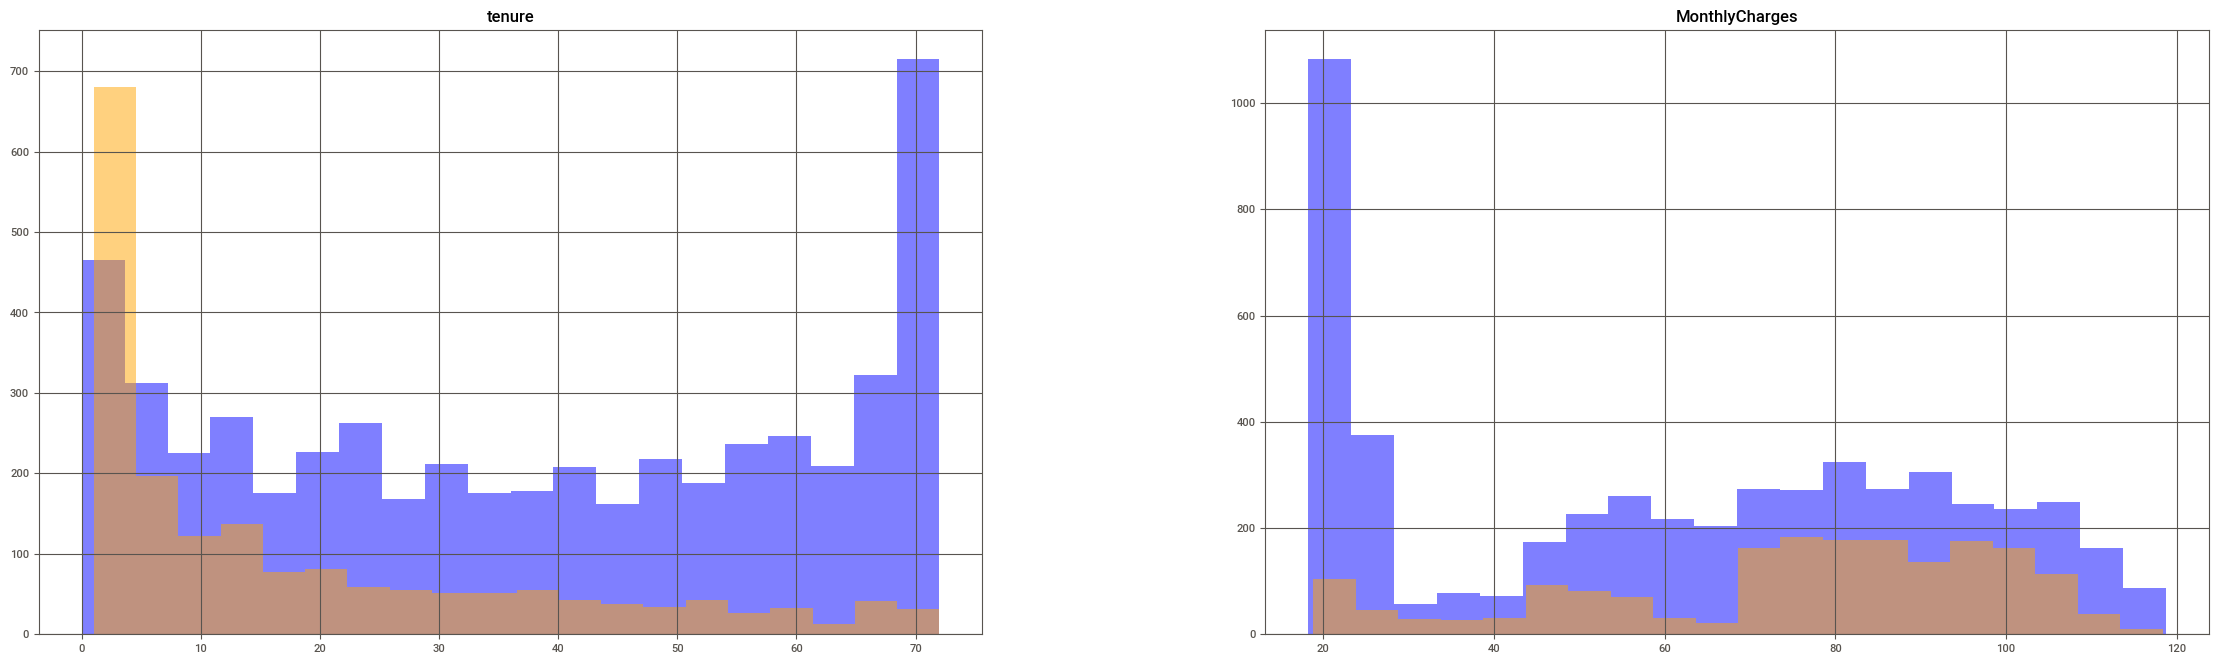

In [14]:
# Visualize numerical data

numericFeatures = ['tenure', 'MonthlyCharges']
fig, ax = plt.subplots(1,2, figsize=(28, 8))
df[df.Churn == "No"][numericFeatures].hist(bins=20, color='blue', alpha=0.5, ax=ax)
df[df.Churn == "Yes"][numericFeatures].hist(bins=20, color='orange', alpha=0.5, ax=ax)

In [15]:
# Remove unnecessary columns

cleanDF = df.drop('customerID', axis=1)

In [16]:
# Convert all the non-numeric columns to numeric

for column in cleanDF.columns:
  if cleanDF[column].dtype == np.number:
    continue
  cleanDF[column] = LabelEncoder().fit_transform(cleanDF[column])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  after removing the cwd from sys.path.


In [17]:
# Data types

cleanDF.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges          int64
Churn                 int64
dtype: object

Scaling the data



In [18]:
x = cleanDF.drop('Churn', axis=1)
y = cleanDF['Churn']
x = StandardScaler().fit_transform(x)

In [19]:
# Split the data into 80% training and 20% testing sets

xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=42)

Create and Train the model

In [20]:
model = LogisticRegression()

# Train the model
model.fit(xtrain, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Create the predictions on the test data

In [21]:
predictions = model.predict(xtest)

In [22]:
# print the predictions

print(predictions)

[1 0 0 ... 0 0 0]


In [23]:
# Check the precision, recall and f1-score

print(classification_report(ytest, predictions))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.69      0.56      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409

